In [41]:
import sys
import os
# go to upper diretory
sys.path.append(os.path.abspath('./../../'))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from tabulate import tabulate
from sklearn.preprocessing import minmax_scale
from Audio_Sentiment_Analysis.utils.Configuration import Configuration

In [42]:
EXTRACTED_FEATURES_FILE = 'extracted_features_ent05.csv'
SCALED_FEATURES = 'scaled_features.csv'
CONFIG_FILE = f"{os.path.abspath('./../../')}/Audio_Sentiment_Analysis/data/config.json"
config = Configuration.load_json(CONFIG_FILE)
pd.options.display.max_columns = None

### Load the processed features writen in the dataset

In [43]:
df = pd.read_csv(EXTRACTED_FEATURES_FILE)
print(df.shape)
df = df.sort_values(['Subject', 'Emotion'], ascending = (True, True))
df = df.set_index('Subject')
df

(1287, 36)


,File,Emotion,Emotion_Id,mel_mean,mel_min,mel_max,mel_var,mel_std,chroma_stft,rms,spectral_centroid,spectral_contrast,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
Subject,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,s1_an_1,anger,0,5.470246,4.425599e-10,2683.060303,2835.492676,53.249344,0.402497,0.129479,1814.026368,22.718679,1834.495092,3811.157227,0.093647,-171.056549,115.938042,-28.566433,21.314878,-26.507704,10.144446,-22.394417,-6.446075,-20.058737,-9.614691,-15.731797,-8.805967,-2.915169,-12.226694,-5.387331,-4.913489,-9.523164,-1.791623,-3.507744,0.083974
1,s1_an_2,anger,0,4.795431,3.266728e-10,1598.459473,1602.659546,40.033230,0.369817,0.122001,1813.929245,22.243432,1772.517500,3602.609923,0.095251,-187.978119,114.721764,-41.258282,22.174334,-12.715221,11.881122,-22.636301,-9.284857,-23.113138,-7.031469,-15.980973,-11.601790,-5.727098,-6.378960,-7.155037,-7.385511,-8.306025,4.346861,-6.595266,-2.742662
1,s1_an_3,anger,0,3.334237,3.032449e-10,689.850159,542.464478,23.290867,0.402758,0.093039,1699.189320,21.846660,1764.541591,3558.226103,0.089708,-241.878052,123.269180,-36.750164,15.108225,-17.863935,12.198894,-16.139629,-8.320073,-9.156641,-3.037857,-7.307014,-2.118013,-5.378597,-6.666719,-4.749491,-4.346241,-5.281549,3.802923,-7.263710,3.085279
1,s1_an_4,anger,0,7.300478,3.510179e-10,3062.532715,4610.922363,67.903770,0.272837,0.155781,1578.663080,23.566948,1679.770568,3222.159447,0.068912,-166.445877,122.271973,-42.199047,19.365204,-21.122906,8.933196,-21.792807,-10.018277,-22.990004,-9.038509,-19.050367,-9.762542,0.404813,-14.561901,-6.730536,-4.809193,-5.546733,2.948940,-6.117626,-3.003350
1,s1_an_5,anger,0,6.344573,4.247520e-10,4932.327637,6391.681152,79.947990,0.312011,0.140534,1577.596083,23.661057,1621.112545,3149.887457,0.072095,-180.083939,119.054886,-42.182270,26.999893,-6.590927,8.636041,-17.951384,-20.642817,-24.792248,-4.610571,-18.438587,-11.906023,-3.913879,-11.295942,-3.214928,-6.571509,-0.506520,1.930403,-6.855783,-2.346526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,s44_su_1,surprise,5,0.954235,4.915989e-10,224.215332,66.601624,8.160982,0.409652,0.046429,2228.845452,19.080932,2059.571861,4375.130687,0.113248,-350.914062,93.097412,-26.317905,25.358507,-15.363772,-11.670147,-23.264053,-10.100519,-6.451726,-2.232788,-7.934346,0.660806,-14.983005,6.784021,-5.266866,-8.150658,-2.837487,1.328877,-2.739572,0.314563
44,s44_su_2,surprise,5,1.101146,5.241394e-10,589.722046,168.118729,12.966061,0.355514,0.048610,2135.804124,19.680455,2076.691299,4198.172841,0.100513,-362.011230,89.571175,-15.236394,17.948904,-5.406352,-10.824087,-24.498322,-6.493358,-7.331307,-5.918391,-5.593808,3.912724,-7.423474,5.729438,-0.965025,-9.030694,-4.325404,-0.176191,-3.972313,-1.684264
44,s44_su_3,surprise,5,1.229583,5.804714e-10,417.612732,121.597954,11.027146,0.280017,0.061023,1812.903932,20.825387,1885.834414,3524.239971,0.077017,-319.968811,99.618080,-17.096769,29.853142,-13.175083,-24.555374,-29.487928,-13.000087,-14.075120,-10.004211,-17.904245,-1.119938,-19.384010,4.354843,-0.825229,-10.079893,-4.608428,-0.960689,-8.194977,-0.820515


### Min Max Scaling all features
### Store Scaled features in a new file

In [44]:
df[df.columns[2:]] = minmax_scale(df[df.columns[2:]], config.scale_range)
df.to_csv(SCALED_FEATURES)
df

,File,Emotion,Emotion_Id,mel_mean,mel_min,mel_max,mel_var,mel_std,chroma_stft,rms,spectral_centroid,spectral_contrast,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
Subject,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,s1_an_1,anger,0.0,0.749187,0.226190,0.543893,0.383464,0.619121,0.528081,0.827658,0.195442,0.740029,0.298054,0.316421,0.181458,0.917193,0.695340,0.521300,0.425891,0.345490,0.606309,0.534112,0.498706,0.482930,0.380977,0.235475,0.421656,0.488674,0.201833,0.260923,0.350065,0.261784,0.296907,0.501349,0.324593
1,s1_an_2,anger,0.0,0.656711,0.166961,0.323958,0.216739,0.465380,0.436557,0.778661,0.195401,0.672130,0.251716,0.264627,0.188436,0.874480,0.684851,0.405515,0.436568,0.542730,0.633834,0.529863,0.432751,0.416103,0.431380,0.227772,0.347832,0.408824,0.319372,0.228203,0.271015,0.289062,0.479564,0.406021,0.246796
1,s1_an_3,anger,0.0,0.456470,0.154987,0.139710,0.073361,0.270617,0.528811,0.588888,0.146191,0.615444,0.245752,0.253604,0.164317,0.738427,0.758562,0.446642,0.348791,0.469100,0.638870,0.643966,0.455166,0.721455,0.509304,0.495930,0.598252,0.418720,0.313588,0.272729,0.368205,0.356845,0.463378,0.385383,0.407198
1,s1_an_4,anger,0.0,1.000000,0.179403,0.620843,0.623567,0.789595,0.164950,1.000000,0.094499,0.861221,0.182372,0.170140,0.073816,0.928831,0.749963,0.396932,0.401672,0.422495,0.587112,0.544678,0.415711,0.418798,0.392219,0.132880,0.396398,0.582953,0.154896,0.236060,0.353401,0.350902,0.437967,0.420769,0.239621
1,s1_an_5,anger,0.0,0.869004,0.217088,1.000000,0.864392,0.929704,0.274662,0.900099,0.094041,0.874666,0.138516,0.152191,0.087667,0.894406,0.722219,0.397085,0.496512,0.630310,0.582402,0.612145,0.168864,0.379367,0.478617,0.151794,0.339799,0.460314,0.220541,0.301134,0.297045,0.463861,0.407659,0.397978,0.257698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,s44_su_1,surprise,1.0,0.130317,0.251253,0.045289,0.009007,0.094613,0.548119,0.283484,0.373352,0.220305,0.466335,0.456486,0.266760,0.463200,0.498368,0.541813,0.476122,0.504854,0.260564,0.518838,0.413800,0.780635,0.525012,0.476536,0.671627,0.145982,0.583948,0.263153,0.246547,0.411621,0.389760,0.525066,0.330939
44,s44_su_2,surprise,1.0,0.150450,0.267885,0.119406,0.022736,0.150510,0.396499,0.297772,0.333448,0.305959,0.479135,0.412538,0.211338,0.435188,0.467959,0.642908,0.384078,0.647250,0.273973,0.497160,0.497607,0.761391,0.453099,0.548895,0.757494,0.360651,0.562751,0.342779,0.218406,0.378274,0.344975,0.487005,0.275926
44,s44_su_3,surprise,1.0,0.168050,0.296676,0.084506,0.016444,0.127955,0.185057,0.379108,0.194961,0.469535,0.336438,0.245163,0.109087,0.541311,0.554601,0.625936,0.531956,0.536153,0.056342,0.409527,0.346433,0.613845,0.373376,0.168313,0.624606,0.021006,0.535121,0.345367,0.184855,0.371931,0.321632,0.356631,0.299699


## Querying data
### - Group by subject and emotions and calculate the respective mean values

In [45]:
df.groupby(['Subject', 'Emotion']).mean()

Emotion_Id  mel_mean   mel_min   mel_max   mel_var  \
Subject Emotion                                                         
1       anger             0.0  0.746274  0.188926  0.525681  0.432305   
        disgust           0.2  0.301552  0.177212  0.258473  0.085171   
        fear              0.4  0.282142  0.195931  0.237384  0.128988   
        happiness         0.6  0.492395  0.246755  0.280682  0.188731   
        sadness           0.8  0.117414  0.187126  0.125337  0.013165   
...                       ...       ...       ...       ...       ...   
44      disgust           0.2  0.080295  0.241599  0.055503  0.006578   
        fear              0.4  0.045547  0.260561  0.061966  0.006914   
        happiness         0.6  0.112223  0.269963  0.075187  0.010761   
        sadness           0.8  0.013921  0.239756  0.019605  0.000439   
        surprise          1.0  0.145903  0.273549  0.083737  0.016062   

                    mel_std  chroma_stft       rms  spectral_centroid  \
Subject Emotion                                                         
1       anger      0.614884     0.386612  0.819061           0.145115   
        disgust    0.270858     0.511966  0.462770           0.363861   
        fear       0.281034     0.372663  0.434195           0.222595   
        happiness  0.406150     0.446137  0.646510           0.270214   
        sadness    0.113835     0.537471  0.264625           0.240283   
...                     ...          ...       ...                ...   
44      disgust    0.077463     0.425210  0.205331           0.450528   
        fear       0.070282     0.244818  0.141126           0.564211   
        happiness  0.099636     0.448470  0.267631           0.425970   
        sadness    0.019840     0.356886  0.066582           0.510077   
        surprise   0.125129     0.365787  0.315607           0.338325   

                   spectral_contrast  spectral_bandwidth  spectral_rolloff  \
Subject Emotion                                                              
1       anger               0.752698            0.223282          0.231397   
        disgust             0.626821            0.386140          0.434645   
        fear                0.721394            0.311584          0.323331   
        happiness           0.615791            0.359825          0.360447   
        sadness             0.560694            0.393362          0.377942   
...                              ...                 ...               ...   
44      disgust             0.305223            0.579894          0.559945   
        fear                0.336548            0.778872          0.707298   
        happiness           0.345792            0.485014          0.488107   
        sadness             0.245273            0.745097          0.671789   
        surprise            0.351681            0.450340          0.407574   

                   zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  \
Subject Emotion                                                                 
1       anger                0.139139  0.870668  0.722187  0.433495  0.421887   
        disgust              0.371535  0.728126  0.560748  0.529976  0.421270   
        fear                 0.188896  0.687709  0.635249  0.561925  0.572781   
        happiness            0.251319  0.841867  0.622308  0.499888  0.422348   
        sadness              0.226766  0.585468  0.650004  0.657499  0.472316   
...                               ...       ...       ...       ...       ...   
44      disgust              0.302599  0.388934  0.405664  0.663717  0.481043   
        fear                 0.304343  0.285368  0.149148  0.782646  0.436115   
        happiness            0.340665  0.487022  0.471272  0.572923  0.426798   
        sadness              0.304448  0.115694  0.292134  0.823783  0.544692   
        surprise             0.234098  0.469196  0.472711  0.613622  0.436542   

                      mfcc5     mfcc6     mfcc7   

### Group by emotions and calculate the respective mean values

In [46]:
emotion_df = df.groupby(['Emotion']).mean()
emotion_df

,Emotion_Id,mel_mean,mel_min,mel_max,mel_var,mel_std,chroma_stft,rms,spectral_centroid,spectral_contrast,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
Emotion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
anger,0.0,0.268770,0.254518,0.158889,0.063700,0.191203,0.443797,0.423197,0.275551,0.547289,0.365328,0.353937,0.221293,0.646034,0.611030,0.527170,0.459442,0.547004,0.444674,0.612285,0.527574,0.511114,0.480349,0.461575,0.545584,0.433820,0.366132,0.252728,0.460658,0.252692,0.324140,0.405216,0.270288
disgust,0.2,0.148310,0.276574,0.098113,0.030279,0.120932,0.500078,0.283478,0.441134,0.480760,0.502082,0.524096,0.364925,0.563209,0.471857,0.620223,0.479231,0.542205,0.556249,0.555682,0.584166,0.550963,0.497136,0.537677,0.578754,0.432657,0.418956,0.272438,0.491652,0.275408,0.371165,0.390246,0.297805
fear,0.4,0.150794,0.282765,0.095859,0.040563,0.126500,0.442405,0.273724,0.386461,0.501970,0.494152,0.485858,0.287621,0.524971,0.479053,0.634103,0.529637,0.548533,0.579593,0.609917,0.581011,0.575110,0.516863,0.500735,0.555271,0.411094,0.408143,0.272255,0.491740,0.278326,0.348445,0.389616,0.293177
happiness,0.6,0.230514,0.280493,0.141114,0.062179,0.180351,0.472642,0.377594,0.389377,0.503503,0.435408,0.457166,0.327963,0.622047,0.505392,0.558088,0.441869,0.517489,0.518255,0.547035,0.556880,0.542349,0.515364,0.512105,0.527150,0.393490,0.400714,0.277871,0.471560,0.279951,0.380115,0.405937,0.288905
sadness,0.8,0.059617,0.271755,0.047848,0.007586,0.053430,0.529608,0.151340,0.382754,0.417240,0.532777,0.508841,0.287832,0.409269,0.525426,0.701378,0.534444,0.569420,0.644816,0.655460,0.620533,0.623026,0.549245,0.590223,0.604299,0.453114,0.430164,0.278474,0.514876,0.286716,0.360282,0.407477,0.303585
surprise,1.0,0.161122,0.293521,0.100185,0.033537,0.128476,0.500540,0.293261,0.312776,0.468335,0.436771,0.413503,0.246238,0.541951,0.590321,0.627015,0.462238,0.534525,0.530426,0.584236,0.537678,0.599954,0.523220,0.553716,0.551120,0.393550,0.404137,0.283050,0.460078,0.261759,0.335888,0.396316,0.271065


## Feature Analysis

### Bar Plots of Mel Spectogram Values

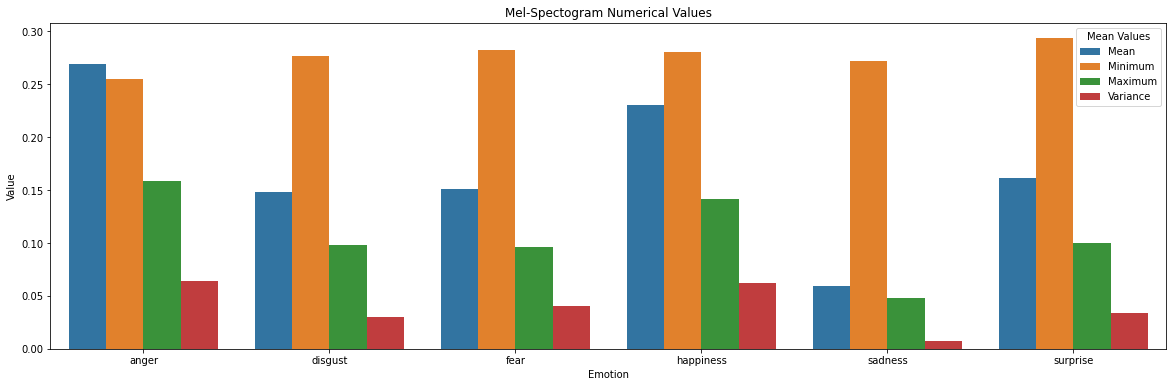

In [47]:
df_barplot = pd.DataFrame(
    zip(
        list(emotion_df.index.values)*6,
        ["Mean"]*6+["Minimum"]*6+["Maximum"]*6+["Variance"]*6+["Standard Deviation"]*6,
        list(emotion_df['mel_mean'].values)+list(emotion_df['mel_min'].values)+list(emotion_df['mel_max'].values)+\
            list(emotion_df['mel_var'].values)
    ),
    columns=["Emotion", "Mean Values", 'Value']
)

plt.figure(figsize=(20, 6))
plt.title("Mel-Spectogram Numerical Values")
sns.barplot(x="Emotion", hue="Mean Values", y="Value", data=df_barplot)
plt.show()

### Bar Plots of Spectral Values

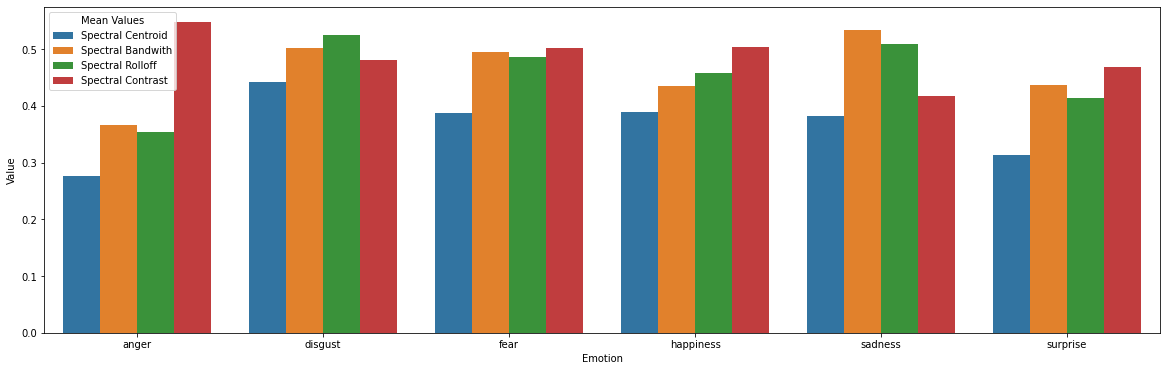

In [48]:
df_barplot = pd.DataFrame(
    zip(
        list(emotion_df.index.values)*6,
        ["Spectral Centroid"]*6+["Spectral Bandwith"]*6+
            ["Spectral Rolloff"]*6+["Spectral Contrast"]*6,
        list(emotion_df['spectral_centroid'].values)+list(emotion_df['spectral_bandwidth'].values)+\
            list(emotion_df['spectral_rolloff'].values)+list(emotion_df['spectral_contrast'].values)
    ),
    columns=["Emotion", "Mean Values", 'Value']
)

plt.figure(figsize=(20, 6))
sns.barplot(x="Emotion", hue="Mean Values", y="Value", data=df_barplot)
plt.show()

### Bar Plots of other Features

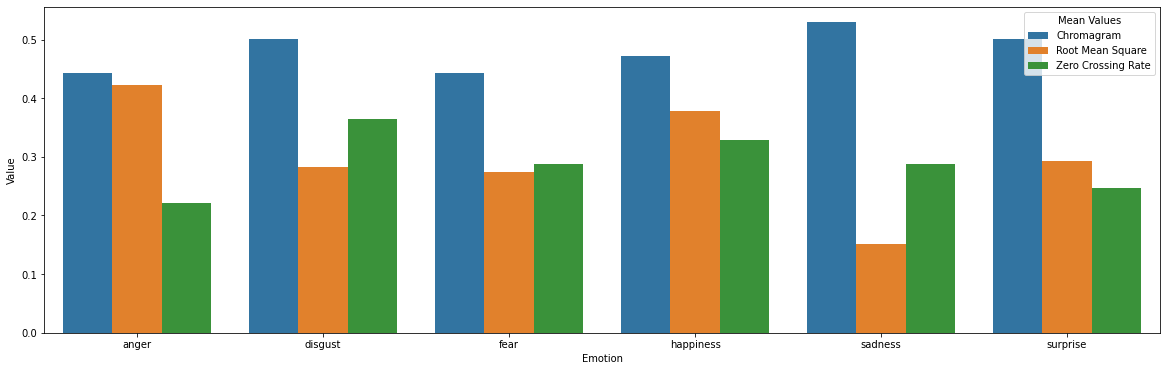

In [49]:
df_barplot = pd.DataFrame(
    zip(
        list(emotion_df.index.values)*6,
        ["Chromagram"]*6+["Root Mean Square"]*6+["Zero Crossing Rate"]*6,
        list(emotion_df['chroma_stft'].values)+list(emotion_df['rms'].values)+list(emotion_df['zero_crossing_rate'].values)
    ),
    columns=["Emotion", "Mean Values", 'Value']
)

plt.figure(figsize=(20, 6))
sns.barplot(x="Emotion", hue="Mean Values", y="Value", data=df_barplot)
plt.show()

### Bar Plots of MFCC Values

## Features' Correlation with Emotion

In [50]:
df_corr = abs(df.corr()["Emotion_Id"]).sort_values()
display_html(tabulate(df_corr.items(), headers=["Feature", "Correlation Value"], tablefmt="html"), raw=True)

Feature,Correlation Value
mfcc5,0.00345004
spectral_centroid,0.00397181
mfcc20,0.00774941
mfcc19,0.00978996
mfcc16,0.0169484
mfcc12,0.0196251
mfcc2,0.0238198
zero_crossing_rate,0.0246027
mfcc18,0.0251572
mfcc7,0.0315541


# Single Feature Analysis


In [51]:
def analyse_feature(df_corr, feature):
    print(f"{feature} Correlation to Emotion: {df_corr[feature]:0.04f}")
    print(f"Position {list(df_corr.index).index(feature)} out of {len(df_corr)-1} features")

    fig = plt.figure(figsize=(20, 11))
    fig.suptitle(feature, fontsize=18)

    grid = plt.GridSpec(3, 6, wspace=.6, hspace=.4)
    y_ticks = np.arange(0.0, 1.1, 0.1)

    ax = plt.subplot(grid[0, :])
    ax.set_title("For All Subjects")
    sns.boxplot(x=df["Emotion"], y=df[feature], width=0.3, ax=ax)
    ax.set_yticks(y_ticks)

    for i in range(1,6):
        if i < 3:
            r, c_s, c_f = 1, (i-1)*3, (i-1)*3+3
        else:
            r, c_s, c_f = 2, (i-3)*2, (i-3)*2+2

        ax = plt.subplot(grid[r, c_s:c_f])
        ax.set_title(f"For Subject {i}")
        subj_data = df.loc[df.index == i]
        sns.boxplot(x=subj_data["Emotion"], y=subj_data[feature], width=0.3, ax=ax);
        ax.set_yticks(y_ticks)

    plt.show()

## Zero Crossing Rate Analysis

zero_crossing_rate Correlation to Emotion: 0.0246
Position 7 out of 32 features


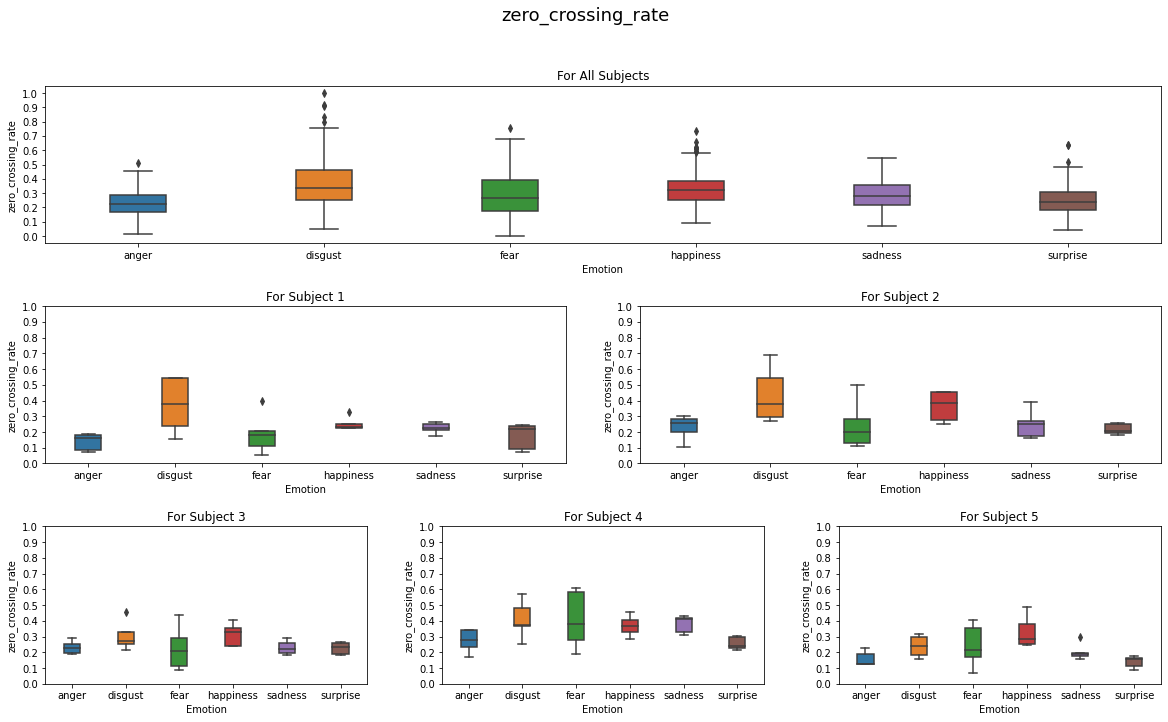

In [52]:
analyse_feature(df_corr, "zero_crossing_rate")

## Root Mean Square Energy Analysis

rms Correlation to Emotion: 0.2241
Position 30 out of 32 features


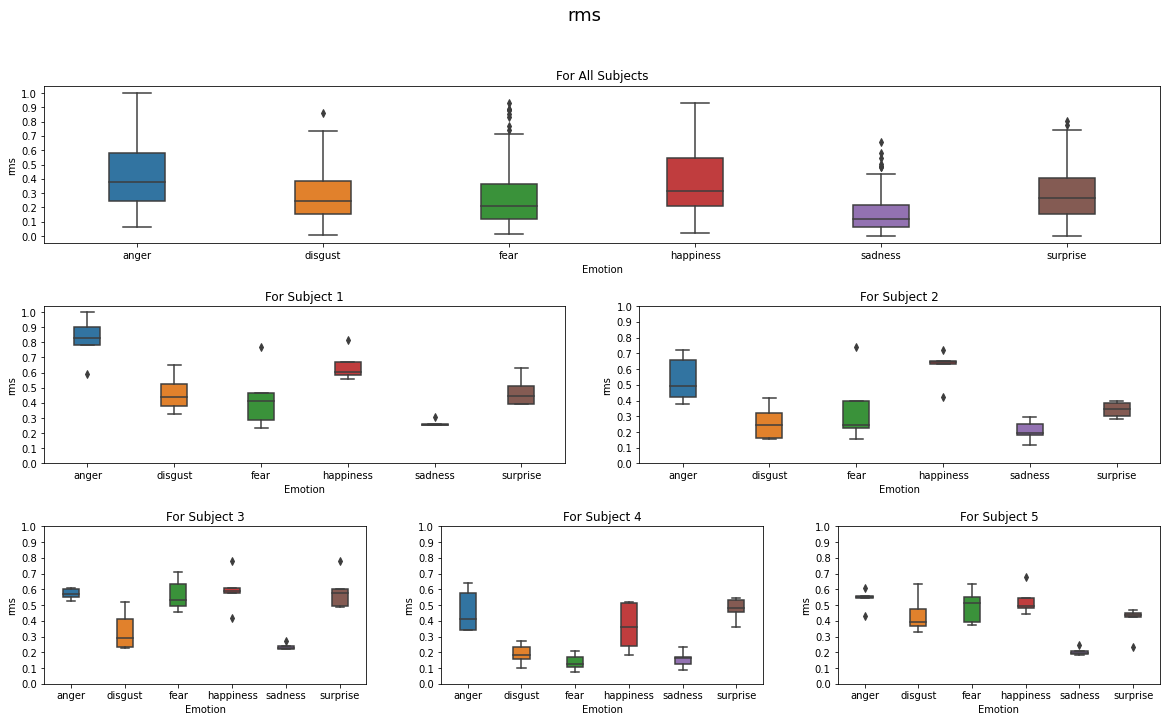

In [53]:
analyse_feature(df_corr, "rms")